In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv("./data.csv")

In [2]:
df

,TSA Pre-Check Arrival Times,Regular Pax Arrival Times,ID Check Process Time 1,ID Check Process Time 2,Milimeter Wave Scan times,X-Ray Scan Time,X-Ray Scan Time.1,Time to get scanned property,Unnamed: 8,Column,Process,Notes
0,00:00.0,00:00.0,00:07.5,00:14.6,00:08.8,00:02.5,00:00.0,0:48,NaN,A,TSA PreCheck Arrival Times,Airport checkpoint recoding individuals enteri...
1,00:11.2,00:09.1,00:05.3,00:11.8,00:20.1,00:05.6,00:01.5,0:45,NaN,B,Regular Arrival Times,Airport checkpoint recoding individuals enteri...
2,00:12.5,00:09.7,00:11.1,00:14.8,00:32.5,00:07.3,00:03.5,0:28,NaN,C,ID Check TSA officer 1,The time the arrival of the passenger to the I...
3,00:13.6,00:11.3,00:10.0,00:20.4,00:36.0,00:09.3,00:11.0,0:25,NaN,D,ID Check TSA officer 2,"Same as column C, but for a different TSA offi..."
4,00:15.0,00:12.8,00:09.1,00:07.7,00:43.5,00:20.1,NaN,0:22,NaN,E,mm wave scan times,Time stamps as passenger exited the milimeter ...
5,00:24.6,00:14.3,00:08.8,00:07.5,00:51.7,00:22.4,NaN,0:24,NaN,F,X-Ray Scan Time 1,Time stamps as bags exited the x-ray screening.
6,00:33.9,00:15.9,00:12.6,00:10.9,01:04.6,00:24.5,NaN,0:17,NaN,G,X-Ray Scan Time 2,"Same as column F, but for a different TSA offi..."
7,00:54.4,00:26.8,00:15.4,NaN,01:15.6,00:41.2,NaN,0:33,NaN,H,Time to get scanned property,Time it takes people from arriving at the belt...
8,00:56.0,00:56.8,00:11.9,NaN,01:24.7,01:07.1,NaN,0:08,NaN,NaN,NaN,NaN
9,01:14.6,01:21.1,NaN,NaN,01:32.4,01:08.8,NaN,0:10,NaN,NaN,NaN,NaN


In [19]:
import datetime
def to_sec(time):  # 将M:S的格式转换为秒数, 方便计算
    time_list = time.split(':', 1)
    time_list = pd.to_numeric(time_list)
    return time_list[0] * 60 + time_list[1]
# 计算时间间隔 (时刻)
def interval_time(col):
    origin = df[col].dropna()
    arr = []
    for i in range(1, len(origin)):
        time1 = to_sec(origin[i - 1])
        time2 = to_sec(origin[i])
        arr.append(time2 - time1)
    arr = pd.Series(arr)
    f, ax= plt.subplots(figsize = (12, 6))
    sns.distplot(arr, bins = 10, ax = ax)
    ax.set_title(col + " interval", fontsize = 16)
    ax.set_ylabel('density',fontsize=13)
    ax.set_xlabel('seconds',fontsize=13)
    print("平均时间: {0:.2f}秒".format(arr.mean()))
# 计算平均时间(时间段)
def average_time(col):
    origin = df[col].dropna()
    arr = []
    for i in range(0, len(origin)):
        arr.append(to_sec(origin[i]))
    arr = pd.Series(arr)
    f, ax= plt.subplots(figsize = (12, 6))
    sns.distplot(arr, bins = 10, ax = ax)
    ax.set_title(col + " interval", fontsize = 16)
    ax.set_ylabel('density',fontsize=13)
    ax.set_xlabel('seconds',fontsize=13)
    print("平均时间: {0:.2f}秒".format(arr.mean()))

平均时间: 9.19秒


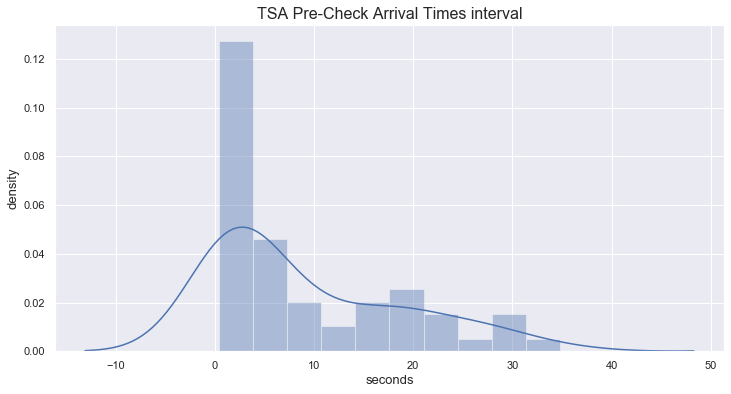

In [4]:
interval_time('TSA Pre-Check Arrival Times')

平均时间: 12.95秒


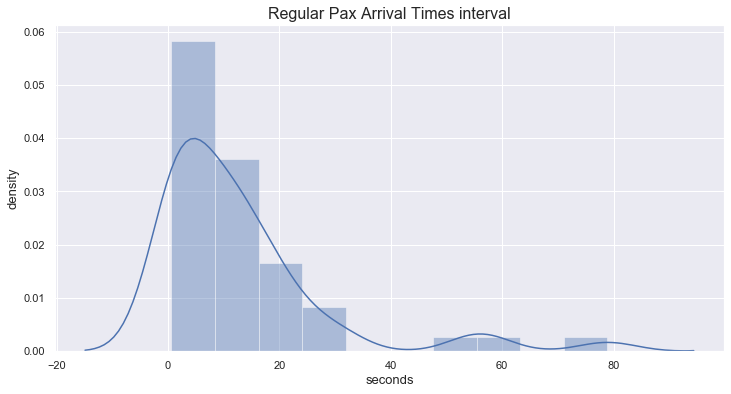

In [5]:
# Regular Pax Arrival Times
interval_time('Regular Pax Arrival Times')

平均时间: 11.64秒


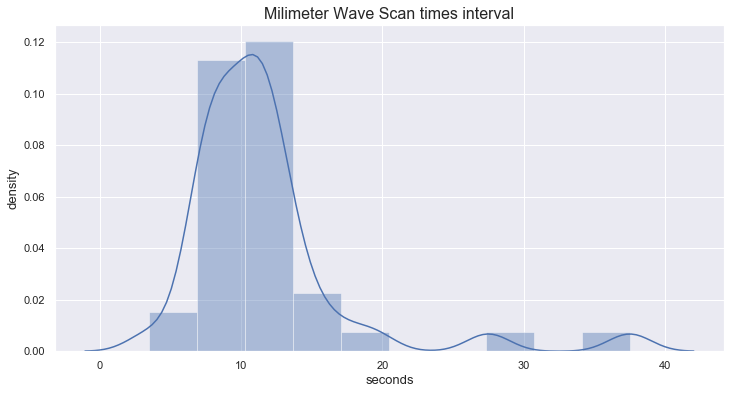

In [6]:
# Milimeter Wave Scan times
interval_time('Milimeter Wave Scan times')

平均时间: 7.54秒


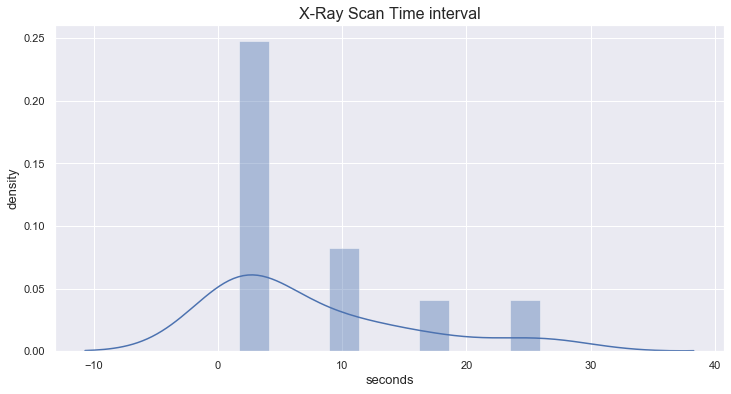

In [7]:
# X-Ray Scan Time
interval_time('X-Ray Scan Time')

平均时间: 3.67秒


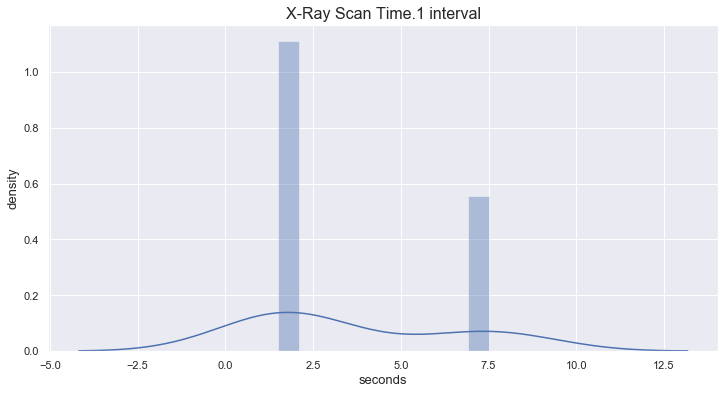

In [8]:
# X-Ray Scan Time.1
interval_time('X-Ray Scan Time.1')

平均时间: 10.19秒


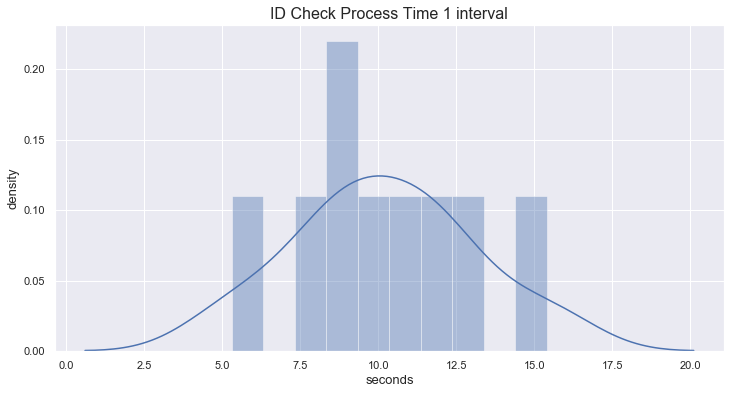

In [20]:
# ID Check Process Time 1
average_time('ID Check Process Time 1')

平均时间: 12.53秒


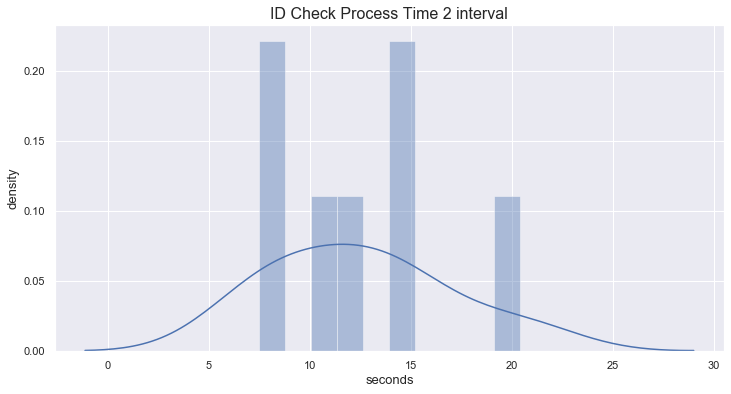

In [21]:
# ID Check Process Time 2
average_time('ID Check Process Time 2')

平均时间: 28.62秒


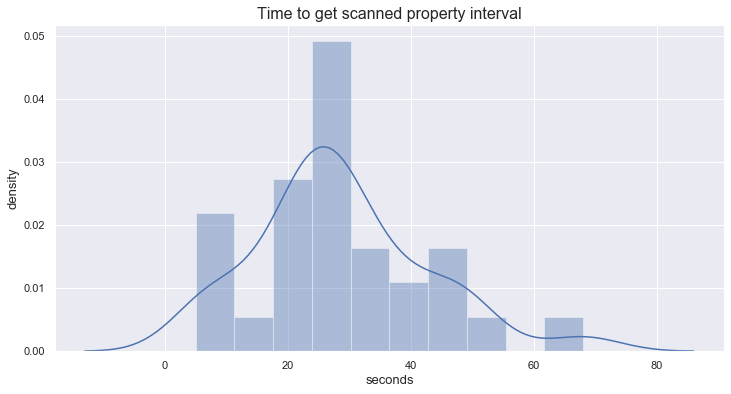

In [22]:
# Time to get scanned property
average_time('Time to get scanned property')